# **Music Recommendation System**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
Music streaming platforms have rapid expanding libraries which produces a major challenge for users. There is not enough time nor energy for the users to find and consume content that is relevant to their taste. To encourage user engagement the best solution is to provide and present content close to the user's taste. Positively engaged users will most likely spend more time on a platform therefore giving the streaming service more chances to increase streams of revenue.

Using the Unified Theory of Acceptance and Use of Technology (UTAUT) researchers have extended the UTAUT model through collected data that categorized contributing factors to user's behavioral intentions. Factors that can be influenced by the product itself are performance expectancy, effort expectancy, hedonic motivation, involvement and interest, and personalization. [1](#1)
<br>

**The objectives:** What is the intended goal?<br>
There is a two part objective to this case study. 1) Engage users and personalize their experience and 2) also increase the ease and enjoyment in finding new music. With the context of the UTAUT extended model, achieving this two part objective will increase user engagement and retention but also user recommendations to their peers.<br>

**The key questions:** What are the key questions that need to be answered?<br>
How many different user profiles are there based on similar song selection?
What other relationships and patterns occur in the data?
What could be the restraints of the solutions we can produce because of the given data?
<br>

**The problem formulation:** What are we trying to solve using data science?
The solution we will be driving towards is formulating accurate predictions for new songs based off of a user's song selection history. Data science can solve this problem by building an appropriate recommendation system. Gathering data in this scenario is fairly easy for the streaming platform and it can be gathered in such a way that it strengthens the model.
<br>

###### 1* ["Music streaming services: understanding the drivers of customer purchase and intention to recommend" Mariana Lopes Barata, Pedro Simões Coelho Aug 2021](https://www.sciencedirect.com/science/article/pii/S2405844021018867)

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release


count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

In [ ]:
count_df_copy = count_df.copy(deep = True)
song_df_copy = song_df.copy(deep = True)

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df_copy.head(n=10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df_copy.head(n=10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
print("Missing values: ",count_df_copy.isnull().values.any())
count_df_copy.info(verbose=True, show_counts=True)

Missing values:  False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  2000000 non-null  int64 
 1   user_id     2000000 non-null  object
 2   song_id     2000000 non-null  object
 3   play_count  2000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
print("Missing values: ", song_df_copy.isnull().values.any())
song_df_copy.info()

Missing values:  True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


**Observations and Insights:**  



Count Data:  
- The shape of the data is 2000000 rows and 4 columns   
- There are no missing values   
- The columns are split between object type and int64  

------
Song Data:  
- The shape of the data is 1000000 rows and 5 columns   
- There are 15 rows missing titles data   
- There are 5 rows missing releases data    
- The columns are all object type except year which is int64   

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df, on = 'song_id', how = 'left').drop_duplicates(subset = ['user_id','song_id'])

# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis = 1)

print('Number of Duplicates:', df.duplicated(subset = ['user_id','song_id']).sum())
print('Shape of Dataframe:', df.shape)
df.head(10)

Number of Duplicates: 0
Shape of Dataframe: (2000000, 7)


,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
10,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding for "user_id" and "song_id"
le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])
df.head()


,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
4,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
5,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():

    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final["play_count"] <= 5]

In [ ]:
# Check the shape of the data
rows, columns = df_final.shape
print("No of rows: ", rows)
print("No of columns: ", columns)
df_final.info()

No of rows:  117876
No of columns:  7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 209 to 2086699
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


## **Exploratory Data Analysis**
Data Description
- Background of the data and what is it about?   
 - The data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. It shows the relationship of song consumption by users.
- Information about the variables included in the data
 - There are two data sets, Count Data and Song Data. The count data shows the user's interaction with one song. The song data gives a description of that song. There is no description of the user other than the user ID.


------
Observations & Insights
- What are some key patterns observed in the data during EDA?
 - There is a left skew in songs played vs songs released
- How do the key patterns affect/relate to the problem?
 - This might signal a bias because streamed music started in late 1990 and early 2000
- What are the data treatments or pre-processing steps required, if any?
 - Combined the data sets, removed the users and items that had incredibly low interaction, dropped duplicates we did not want to consider, and removed any large player counts that would weigh too heavily in creating a rating.

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())

Number of unique USERS in the final data =  3155


Total number of unique song id

In [ ]:
# Display total number of unique song_id
print('Number of unique SONGS in the final data = ', df_final['song_id'].nunique())

Number of unique SONGS in the final data =  563


Total number of unique artists

In [ ]:
# Display total number of unique artists
print('Number of unique ARTISTS in the final data = ', df_final['artist_name'].nunique())

Number of unique ARTISTS in the final data =  232


In [ ]:
print('The number of observations in the final data = ', len(df_final))

The number of observations in the final data =  117876


**Observations and Insights:**  
- There are 400730 observations   
- There are 2992 unique users   
- There are 8111 unique songs  
- There are 2998 unique artists   
----
- There are 24,268,112 possible interactions   
- On average users interacted with any song 133 times
- On average song interacted with any user 49 times
- Users are interacting with multiple songs   
- Songs are being interacted with multiple times   
- The numeric gap between the possible interactions and actual observations creates a possibility of building a recommendation system




### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
print('Most interacted songs =  \n', df_final['song_id'].value_counts())

Most interacted songs =  
 8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64


Most interacted users

In [ ]:
print('Most interacted users = \n', df_final['user_id'].value_counts())

Most interacted users = 
 61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64


**Observations and Insights:**  
The most songs that have been interacted by a user is 621 which is far from the actual number of songs in the present data. We can build a recommendation system to recommend songs to users.   
The most users that have interacted with a song is 751, therefore we can also recommend popular items to users as well.  

Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


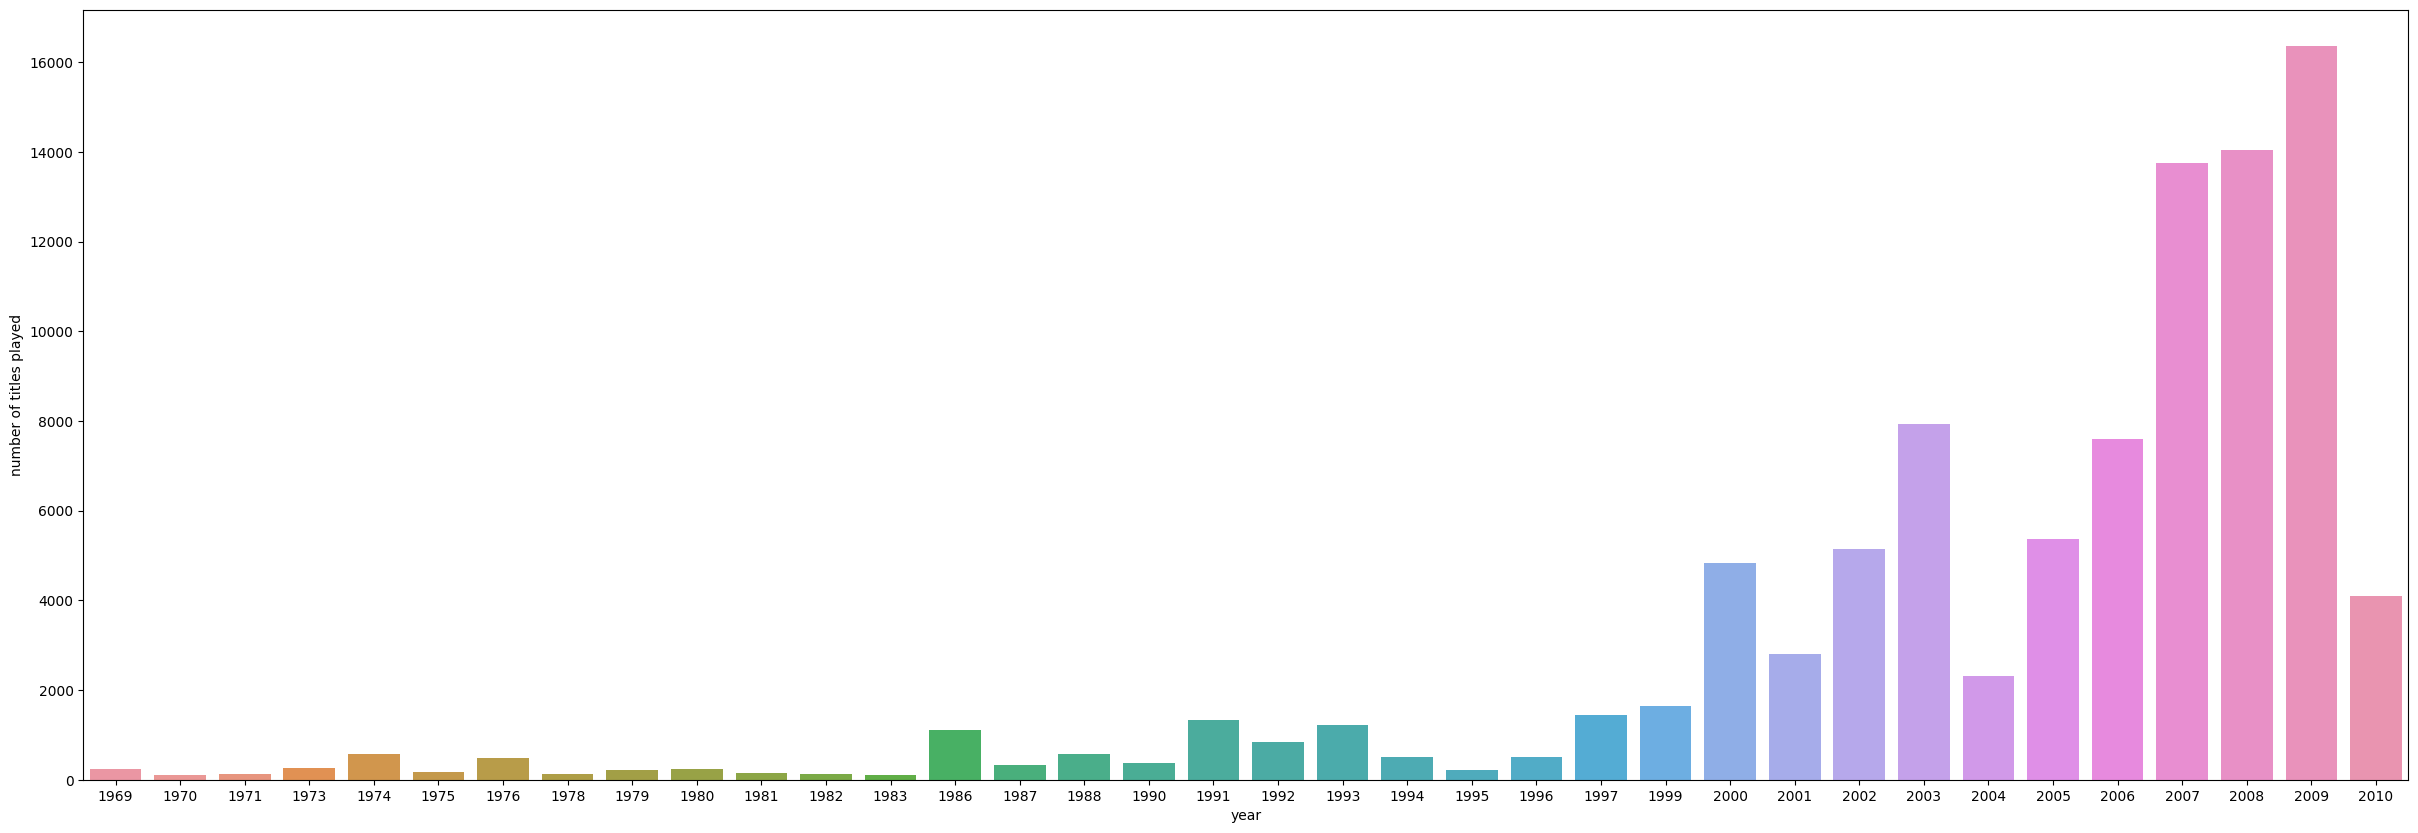

In [ ]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
plt.show()

**Observations and Insights:**  
There is a significant left skew of the data. There is a possibility since streaming became more relevant towards the 2000s that songs that were released during that time had a higher probability to be streamed by the demographic targeted by the platform. There may be a bias where the popularity of a song is affected by the age of release and the emergence of streamed music.

## **Proposed approach**
**Potential techniques:** What different techniques should be explored?<br>
- Rank Based Recommendation System
- Collaborative Filtering Based Recommendation System
- Model Based Collaborative Filtering Recommendation System

Given the data at hand where we only have data about the user - song interaction that it would be appropriate to experiment with these types of techniques.

**Overall solution design:** What is the potential solution design?<br>
Each potential technique will be created and then optimized with optimal hyperparameters using Surprise and Scikit Learn. We then will compare and choose based on our measures of success.

**Measures of success:** What are the key measures of success to compare different potential techniques?<br>
- Precision

- Recall

- F1-Score

Precision and Recall are both important in this situation, so focusing on optimizing for the F1-Score will be the best option.


### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']        # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count()['play_count']         # Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

# It gives top n songs among those being watched for more than min_interactions
def top_n_songs(data, n, min_interaction = 100):

    # Finding songs with interactions greater than the minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]

    # Sorting values with respect to the average rating
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)

    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 50))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 200))

[5531, 2220, 614, 352, 1664, 6246, 4448, 1334, 8019, 7496]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3096342 sha256=c467f873288df29f289e29afa5b3b924d2fc25b6a85679f1d91c66bff3234e4a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[["user_id", "song_id", "play_count"]], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**  
- The calculated RMSE checks how far the overall predicted counts are from the actual counts
- Intuition of Precision: Calculated precision is ~0.40
  - 40% out of all the recommended songs are relevant
- Intuition of Recall: Calculated recall is ~0.69
  - 69% out of all the relevant movies are recommended
- F1 score baseline ~0.50
  - 50% of mostly recommended items were relevant and relevant items were recommended.
- We will try to improve this by using GridSearchCV by tuning different hyperparameters

|                 | User_User |
|-----------------|-----------|
| RSME            | 1.0878    |
| Precision       | 0.396     |
| Recall          | 0.692     |
| F1 Score        | 0.504     |
| Prediction Diff | ~0.2      |

In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**  
- The above output shows that the actual play count for this user-item pair is 2, and the predicted play count is ~1.8 by this user-user similarity based baseline model.
- The output also contains "actual_k". It is the K value in KNN that is used while training, the default value is 40.



Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine', 'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0465563863896452
{'k': 50, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=9, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**  
- We can see after tuning the hyperparameters:
  - ↑  RMSE increased by ~0.04
  - ↑  Precision intuition increased by ~0.02
  - ↑  Recall intuition increased by ~0.03
  - ↓  F_1 score decreased by by ~0.02
- We can say overall the performance does not have a noticeable improvement

|                 | User_User | User_User_Opt |
|-----------------|-----------|---------------|
| RSME            | 1.0878    | 1.0521        |
| Precision       | 0.396     | 0.413         |
| Recall          | 0.692     | 0.721         |
| F1 Score        | 0.504     | 0.525         |
| Prediction Diff | ~0.2      | ~0.04         |

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**  
- The above output shows that the actual play count for this user-item pair is 2, and the predicted play count is ~1.96 by this user-user similarity based optimized model.
- ~0.04 difference of error
- Tuning of the hyperparameters decreased the difference of error by ~0.16


In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0,5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights:**  
The top five recommended songs have a predicted play count of >2. This can be interpreted that the songs will be played again therefore enough for user engagement and increasing time spent on the application.

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Difference
  ranked_songs['play_count_difference'] = ranked_songs['predicted_play_count'] - ranked_songs['corrected_play_count']

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

In [ ]:
# Applying the ranking_songs function on the final_play data
print(ranking_songs(recommendations, final_play)['play_count_difference'].mean())
ranking_songs(recommendations, final_play)

0.058483597104098804


,song_id,play_freq,predicted_play_count,corrected_play_count,play_count_difference
0,5531,618,2.553335,2.513109,0.040226
2,317,411,2.518269,2.468943,0.049326
1,5943,423,2.390723,2.342101,0.048622
3,4954,183,2.406776,2.332854,0.073922
4,8635,155,2.396606,2.316284,0.080322


**Observations and Insights:**  
After calculating the corrected play count - on average there is a difference of ~0.06 from the predicted play count, which is not an impactable difference. The predicted play count is slightly higher than the corrected play count.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**  
- The calculated RMSE checks how far the overall predicted counts are from the actual counts
- Intuition of Precision: Calculated precision is ~0.30
  - 30% out of all the recommended songs are relevant
- Intuition of Recall: Calculated recall is ~0.56
  - 56% out of all the relevant movies are recommended
- F1 score baseline ~0.40
  - 40% of mostly recommended items were relevant and relevant items were recommended.
- We will try to improve this by using GridSearchCV by tuning different hyperparameters


|                 | User_User | User_User_Opt | Item_Item |
|-----------------|-----------|---------------|-----------|
| RSME            | 1.0878    | 1.0521        | 1.0394    |
| Precision       | 0.396     | 0.413         | 0.307     |
| Recall          | 0.692     | 0.721         | 0.562     |
| F1 Score        | 0.504     | 0.525         | 0.397     |
| Prediction Diff | ~0.2      | ~0.04         | ~0.64     |

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**  
- The above output shows that the actual play count for this user-item pair is 2, and the predicted play count is ~1.36 by this item-item similarity based baseline model.
- Item-item similarity model prediction seems to perform not as well with a difference of ~0.64 to the actual play count. (Difference of ~0.44 compared to the user-user similarity model)

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])
# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.023373689573307
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [ ]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False,
               'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=6, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:**  
- We can see after tuning the hyperparameters:
  - ↓  RMSE decreased by ~0.01
  - ↑  Precision intuition increased by ~0.1
  - ↑  Recall intuition increased by ~0.1
  - ↑  F_1 score increased by by ~0.1
- We can say overall the performance slightly improved and is comparable to user-user optimized model, however has lower performance ratings.

|                 | User_User | User_User_Opt | Item_Item | Item_Item_Opt |
|-----------------|-----------|---------------|-----------|---------------|
| RSME            | 1.0878    | 1.0521        | 1.0394    | 1.0328        |
| Precision       | 0.396     | 0.413         | 0.307     | 0.408         |
| Recall          | 0.692     | 0.721         | 0.562     | 0.665         |
| F1 Score        | 0.504     | 0.525         | 0.397     | 0.506         |
| Prediction Diff | ~0.2      | ~0.04         | ~0.64     | ~0.04         |

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**  
- The above output shows that the actual play count for this user-item pair is 2, and the predicted play count is ~1.96 by this item-item similarity based optimized model.
- ~0.04 difference of error
- Tuning of the hyperparameters decreased the difference of error by ~0.6




In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, 5)

[124, 523, 173, 205, 65]

In [ ]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [ ]:
# Applying the ranking_songs function
print(ranking_songs(recommendations, final_play)['play_count_difference'].mean())
ranking_songs(recommendations, final_play)

0.08234907902107444


,song_id,play_freq,predicted_play_count,corrected_play_count,play_count_difference
4,2342,111,2.653903,2.558987,0.094916
2,5101,130,2.386577,2.298871,0.087706
3,139,119,2.313727,2.222057,0.091670
1,7519,168,2.270864,2.193712,0.077152
0,8099,275,2.212702,2.152399,0.060302


**Observations and Insights:**   
After calculating the corrected play count - on average there is a difference of ~0.08 from the predicted play count, which is not an impactable difference. The predicted play count is slightly higher than the corrected play count.


### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0120665373570124
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**   
Matrix Factorization:
- The calculated RMSE checks how far the overall predicted counts are from the actual counts
- Intuition of Precision: Calculated precision is ~0.41
  - 41% out of all the recommended songs are relevant
- Intuition of Recall: Calculated recall is ~0.63
  - 63% out of all the relevant movies are recommended
- F1 score baseline ~0.50
  - 50% of mostly recommended items were relevant and relevant items were recommended.
-----
Matrix Factorization Optimized:
- We can see after tuning the hyperparameters:
  - ↑  RMSE decreased by ~0.01
  - [-]  Precision intuition did not increase or decrease significantly
  - [-]  Recall intuition did not increase or decrease significantly
  - ↓  F_1 score increased by by ~0.01
- We can say overall the performance does not have a noticeable improvement

|                 | User_User | User_User_Opt | Item_Item | Item_Item_Opt | Matrix_Factor | Matrix_Factor_Opt |
|-----------------|-----------|---------------|-----------|---------------|---------------|-------------------|
| RSME            | 1.0878    | 1.0521        | 1.0394    | 1.0328        | 1.0252        | 1.0141            |
| Precision       | 0.396     | 0.413         | 0.307     | 0.408         | 0.41          | 0.415             |
| Recall          | 0.692     | 0.721         | 0.562     | 0.665         | 0.633         | 0.635             |
| F1 Score        | 0.504     | 0.525         | 0.397     | 0.506         | 0.498         | 0.502             |
| Prediction Diff | ~0.2      | ~0.04         | ~0.64     | ~0.04         | ~0.3          | ~0.3              |




In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict('6958', '1671', r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict('6958', '3232', verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

**Observations and Insights:**   
- The above output shows that the actual play count for this user-item pair is 2, and the predicted play count is ~1.70 by this matrix factorization based optimized model.
- ~0.3 difference of error
- Tuning of the hyperparameters did not increase or decrease the performance significantly
- Although the performance metrics seem comparable to better predicting models, the difference in predicted to actual play count is slightly significant



In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
print(ranking_songs(svd_recommendations, final_play)['play_count_difference'].mean())
ranking_songs(svd_recommendations, final_play)

0.09512503575518197


,song_id,play_freq,predicted_play_count,corrected_play_count,play_count_difference
2,7224,107,2.601899,2.505225,0.096674
1,5653,108,2.108728,2.012502,0.096225
4,8324,96,2.014091,1.912029,0.102062
0,9942,150,1.940115,1.858465,0.081650
3,6450,102,1.952493,1.853478,0.099015


**Observations and Insights:**   
After calculating the corrected play count - on average there is a difference of ~0.09 from the predicted play count, which is not an impactable difference. The predicted play count is slightly lower than the corrected play count.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state=1)

# Train the algorithm on the train set
clust_baseline.fit(trainset)

# Compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5 ], 'n_cltr_i': [3, 4, 5 ], 'n_epochs': [20, 30, 40]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
# Fitting data
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.045479087353365
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 30}


In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u=5,n_cltr_i=5, n_epochs=10, random_state=1)

clust_tuned.fit(trainset)

precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:**   
Clustering:
- The calculated RMSE checks how far the overall predicted counts are from the actual counts
- Intuition of Precision: Calculated precision is ~0.40
  - 40% out of all the recommended songs are relevant
- Intuition of Recall: Calculated recall is ~0.6
  - 60% out of all the relevant movies are recommended
- F1 score baseline ~0.47
  - 47% of mostly recommended items were relevant and relevant items were recommended.
-----
Clustering Optimized:
- We can see after tuning the hyperparameters:
  - ↑  RMSE increased by by ~0.02
  - [-] Precision intuition did not increase or decrease significantly
  - ↓  Recall intuition decreased by ~0.01
  - [-]  F_1 score did not increase or decrease significantly
- We can say overall the performance does not have a noticeable improvement in the performance metric

|                 | User_User | User_User_Opt | Item_Item | Item_Item_Opt | Matrix_Factor | Matrix_Factor_Opt | Clustering | Clustering_Opt |
|-----------------|-----------|---------------|-----------|---------------|---------------|-------------------|------------|----------------|
| RSME            | 1.0878    | 1.0521        | 1.0394    | 1.0328        | 1.0252        | 1.0141            | 1.0487     | 1.0654         |
| Precision       | 0.396     | 0.413         | 0.307     | 0.408         | 0.41          | 0.415             | 0.397      | 0.394          |
| Recall          | 0.692     | 0.721         | 0.562     | 0.665         | 0.633         | 0.635             | 0.582      | 0.566          |
| F1 Score        | 0.504     | 0.525         | 0.397     | 0.506         | 0.498         | 0.502             | 0.472      | 0.465          |
| Prediction Diff | ~0.2      | ~0.04         | ~0.64     | ~0.04         | ~0.3          | ~0.3              | ~0.71      | ~0.09          |


In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:**   
- The above output shows that the actual play count for this user-item pair is 2, and the predicted play count is ~1.91 by this matrix factorization based optimized model.
- ~0.09 difference of error
- Tuning of the hyperparameters did increase the performance slightly
- Although the performance metrics seem on the lower bound compared to the other predictive models, the difference in predicted to actual play count is comparable to the other better performing models.



#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
print(ranking_songs(clustering_recommendations, final_play)['play_count_difference'].mean())
ranking_songs(clustering_recommendations, final_play)

0.08827351600728806


,song_id,play_freq,predicted_play_count,corrected_play_count,play_count_difference
4,7224,107,3.711503,3.614829,0.096674
3,5653,108,2.903883,2.807658,0.096225
0,6860,169,2.691043,2.614120,0.076923
1,657,151,2.606354,2.524975,0.081379
2,8483,123,2.582807,2.492640,0.090167


**Observations and Insights:**   
After calculating the corrected play count - on average there is a difference of ~0.09 from the predicted play count, which is not an impactable difference. The predicted play count is slightly lower than the corrected play count.


### Content Based Recommendation Systems

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text']=df_small['title'].astype(str)+' '+df_small['release']+' '+df_small['artist_name']
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
col_names = ['user_id', 'song_id', 'play_count', 'title', 'text']
df_small = df_small[col_names]
# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'], keep = 'first')
# Set the title column as the index
df_small = df_small.set_index('title')
# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices =pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Download omw-1.4
nltk.download('omw-1.4')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer=tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
df_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(df_tfidf, df_tfidf)
pd.DataFrame(similar_songs)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281738,0.000000,0.0,...,0.0,0.235124,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.065677,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.192766,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.192766,1.000000,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations("Learn To Fly", similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**
- With the given data unable to verify whether the songs are actually relevant to each other.



## **Conclusion and Recommendations:**




- In this case study, we built recommendation systems using five different algorithms. They are as follows:


- Rank-based using averages
- User-User similarity based collaborative filtering + optimization
- Item-Item similarity based collaborative filtering + optimization
- Model-based collaborative filtering (max factorization) +
- Cluster-based + optimization
- Content-based


- The surprise library was used to demonstrate"user-user similarity-based collaborative filtering," "item-item similarity-based collaborative filtering," and "model-based collaborative filtering (matrix factorization)", "cluster-based" algorithms. For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions are created using the optimal hyperparameters. The nltk library was used for the "content-based" algorithm.
- For performance evaluation of these models precision@k and recall@k are used. Using these two metrics, the F_1 score is calculated for each working model.
- Overall, the user-user similarity based optimized model has given the best performance in terms of F1 Scores
- In terms of best performance in these metrics:
 - RSME: User-User Baseline
 - Precision: Matrix Factorization Opt
 - Recall: User-User Opt
 - User Prediction: User-User Opt / Item-Item Opt
- We can try to improve the performance of these models using hyperparameter tuning.
- We can also combine different recommendation techniques to build hybrid recommendation systems.


------


- **Refined Insights -** What are the most meaningful insights from the data relevant to the problem?
 - The data does not have enough information to verify whether the kind of music taste the user has or if the songs are actually relevant to each other. A user profile is built off an interaction that is blind to the observer. This creates a blind spot for a business to correctly serve their users with meaningful content to their users.
- **Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
 - The best performing metric and execution is the User-User Similarity optimized model, which for this data set would make sense where similar users would like similar songs. Although item-item similarity optimized model did execute similarly it did not perform well in metrics
- **Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?
 - A hybrid between user-user optimization and item-item optimization will, although not create a full profile of a user's taste, it will cross verify and get a profile of a music group.




|                 | User_User | User_User_Opt | Item_Item | Item_Item_Opt | Matrix_Factor | Matrix_Factor_Opt | Clustering | Clustering_Opt |
|-----------------|-----------|---------------|-----------|---------------|---------------|-------------------|------------|----------------|
| RSME            | 1.0878    | 1.0521        | 1.0394    | 1.0328        | 1.0252        | 1.0141            | 1.0487     | 1.0654         |
| Precision       | 0.396     | 0.413         | 0.307     | 0.408         | 0.41          | 0.415             | 0.397      | 0.394          |
| Recall          | 0.692     | 0.721         | 0.562     | 0.665         | 0.633         | 0.635             | 0.582      | 0.566          |
| F1 Score        | 0.504     | 0.525         | 0.397     | 0.506         | 0.498         | 0.502             | 0.472      | 0.465          |
| Prediction Diff | ~0.2      | ~0.04         | ~0.64     | ~0.04         | ~0.3          | ~0.3              | ~0.71      | ~0.09          |
| Corrected Diff  |           | ~0.06         |           | ~0.08         |               | ~0.1              |            | ~0.09          |